In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [109]:
import numpy as np
import pylab as plt

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from grid import regridXYZMasked, regridXYZ
from lassiAnalysis import loadLeicaData, maskXYZ

In [11]:
n = 512
maskRadius = 50
guess = [60., 0, 0, -50., 0, 0]
scanDir = '/home/scratch/psalas/LASSI/gpus/output/'

In [12]:
scans = ['2020_03_16_02:28:31.ptx.csv',
         '2020_03_16_03:02:51.ptx.csv',
         '2020_03_16_06:43:17.ptx.csv']

In [13]:
sigScanArr = np.zeros((len(scans), 3, n, n), dtype=np.float)

In [16]:
for i, scan in enumerate(scans):
    orgData, cleanData = loadLeicaData("{}/{}".format(scanDir, scan), n=n, numpy=False)
    sigScanArr[i] = orgData

In [100]:
sigScanArr = np.ma.masked_invalid(sigScanArr)

In [101]:
rms = np.nanstd(sigScanArr[:,2], axis=(1,2))
avgScan = np.average(sigScanArr, axis=0, weights=np.power(rms, -2.))
avgScan = np.ma.masked_invalid(avgScan)
#avgScan[0].mask = avgScan[2].mask | avgScan[0].mask | avgScan[1].mask
#avgScan[1].mask = avgScan[2].mask | avgScan[1].mask | avgScan[0].mask
#avgScan[2].mask = avgScan[2].mask | avgScan[1].mask | avgScan[0].mask
#avgScan.fill_value = np.nan

<IPython.core.display.Javascript object>


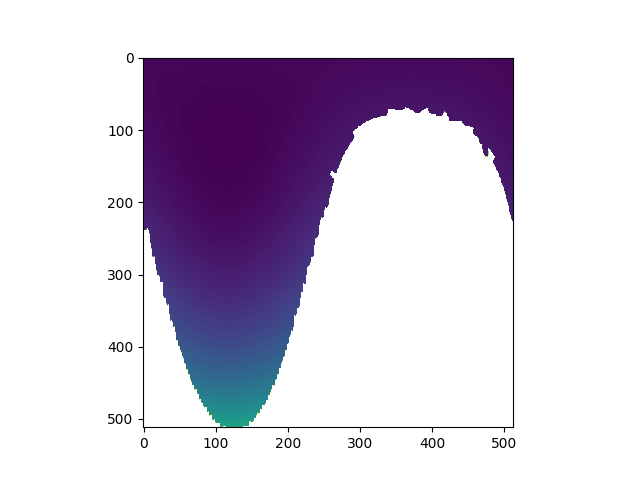

In [104]:
plt.figure()

plt.imshow(avgScan[2])

In [105]:
x, y, z = regridXYZ(avgScan[0], avgScan[1], avgScan[2], n=n)

<IPython.core.display.Javascript object>


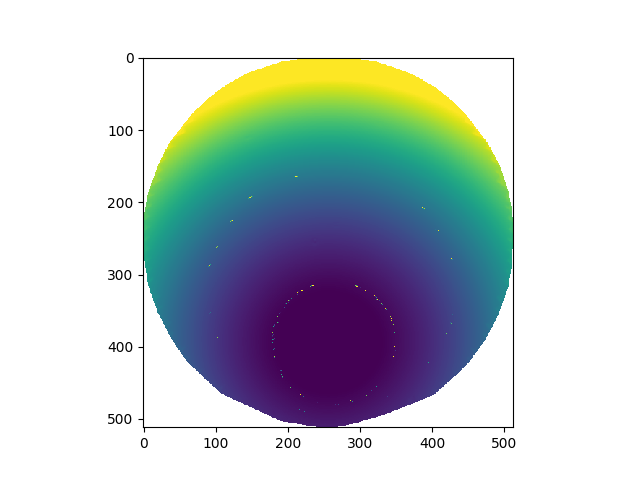

In [107]:
plt.figure()

plt.imshow(z, vmin=-50, vmax=-30)

In [113]:
mdata = maskXYZ(avgScan[0], avgScan[1], avgScan[2], 
                n=512, guess=[60., 0., 0., -50., 0., 0.], 
                bounds=None, radialMask=True, maskRadius=50.)